In [6]:
# Functions:
# 1) Reads degree centrality values form csv, 
# 2) displays histograms and 
# 3) analyses power law fit
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
import time
import statsmodels.api as sm
from fun.fun import *

In [7]:
# Variables
edges_fn = '../data/edges.csv'
edges_prq = "../data/edges.parquet"
degree_fn = '../data/degree_centralities.csv'

In [8]:
# -> IN : PARQUET Read edges from parquet to dataframe
print("reading edges ... ", end='')
start = time.time()
df = dd.read_parquet(edges_prq)
df[['source', 'target']] = df[['source', 'target']].astype('int32')
end = time.time()
print("read {:_} lines (took {:.1f}s)".format(len(df), (end-start)))
print(df.dtypes)
df.head()

reading edges ... read 684_732_453 lines (took 0.2s)
source    int32
target    int32
dtype: object


,source,target
0,13,103151
1,13,214293
2,103151,214293
3,13,138731
4,13,42023


In [9]:
# -> IN : Read list of nodes
nodes = pd.read_csv('../data/node_ids.csv', index_col='index')
print("Number of nodes: {:_}".format(len(nodes)))

Number of nodes: 410_885


In [18]:
# -> IN : Read degree centrality values
dc = pd.read_csv(degree_fn, index_col='node')
dc

min: degree


,degree
node,
0,253
1,138
2,102
3,349
4,42
...,...
410880,458
410881,1487
410882,2


In [20]:
# Get min, max, etc
values = dc['degree']
steps = 100
v_min, v_max = min(values), max(values)
print("DEGREE:")
print("min: {:,}".format(v_min))
print("max: {:,}".format(v_max))
print("mean: {:,}".format(int(np.mean(values))))

DEGREE:
min: 1
max: 67,496
mean: 3,332


In [ ]:
# Compute histograms
v_step = (v_max-v_min)/steps
bins = np.arange(v_min, v_max+v_step, (v_max-v_min)/steps)
log_bins = np.logspace(np.log10(v_min), np.log10(v_max), steps+1)

v_hist =           [ len([ x for x in values if (bins[i] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_hist_cum =       [ len([ x for x in values if (bins[0] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_log_hist =       [ len([ x for x in values if (log_bins[i] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]
v_log_hist_cum =   [ len([ x for x in values if (log_bins[0] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]
#at_end = len([x for x in values if x == v_max])

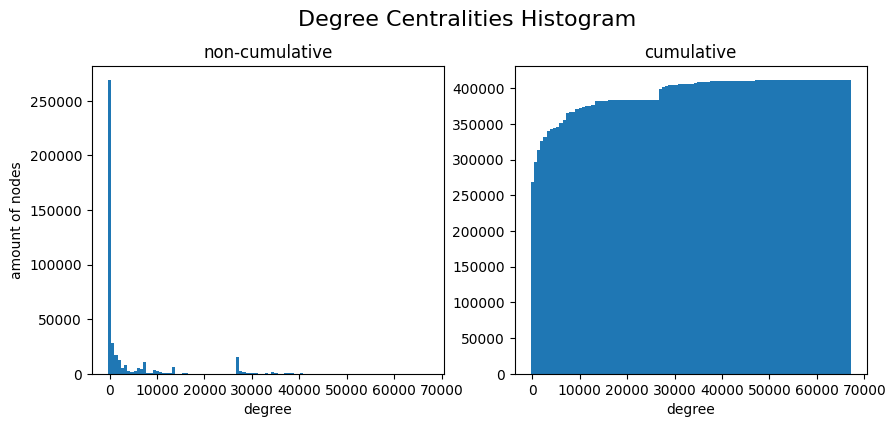

In [44]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
fig.suptitle('Degree Centralities Histogram', fontsize=16, y=1.02)
ax[0].bar(bins[:steps], v_hist, width=v_step)
ax[1].bar(bins[:steps], v_hist_cum, width=v_step)
ax[0].set_title("non-cumulative")
ax[1].set_title("cumulative")
ax[0].set_ylabel("amount of nodes")
ax[0].set_xlabel("degree")
ax[1].set_xlabel("degree")
plt.show()

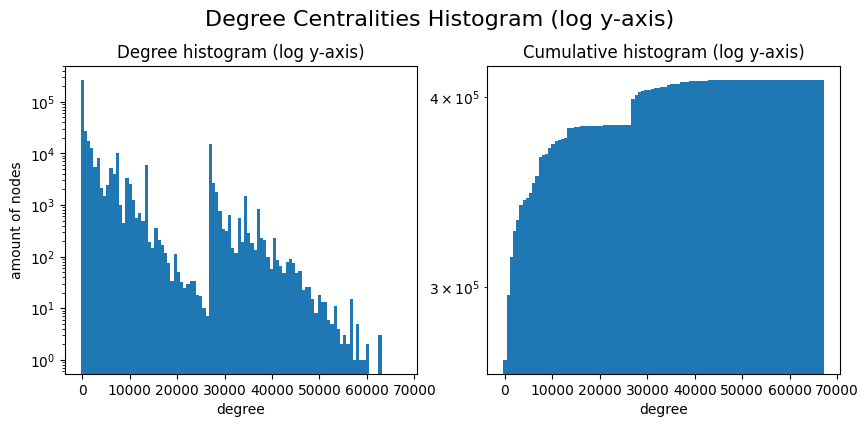

In [46]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
fig.suptitle('Degree Centralities Histogram (log y-axis)', fontsize=16, y=1.02)
ax[0].bar(bins[:steps], v_hist, width=v_step)
ax[1].bar(bins[:steps], v_hist_cum, width=v_step)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_title("Degree histogram (log y-axis)")
ax[1].set_title("Cumulative histogram (log y-axis)")
ax[0].set_ylabel("amount of nodes")
ax[0].set_xlabel("degree")
ax[1].set_xlabel("degree")
plt.show()

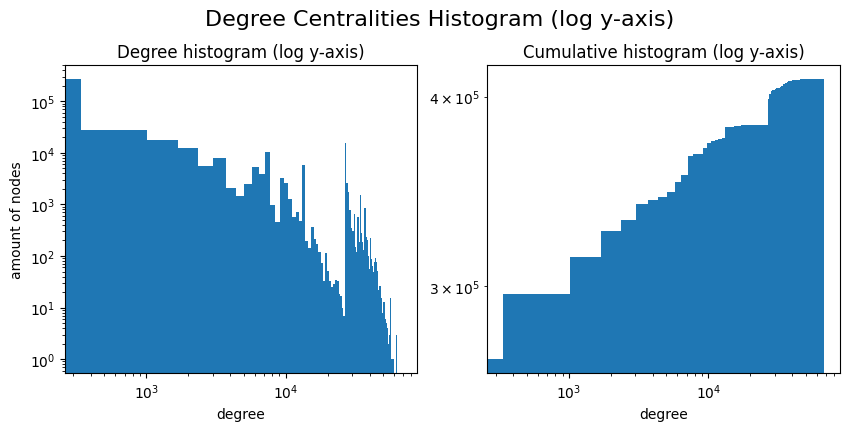

In [53]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
fig.suptitle('Degree Centralities Histogram (log y-axis)', fontsize=16, y=1.02)
ax[0].bar(bins[:steps], v_hist, width=v_step)
ax[1].bar(bins[:steps], v_hist_cum, width=v_step)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_title("Degree histogram (log y-axis)")
ax[1].set_title("Cumulative histogram (log y-axis)")
ax[0].set_ylabel("amount of nodes")
ax[0].set_xlabel("degree")
ax[1].set_xlabel("degree")
plt.show()

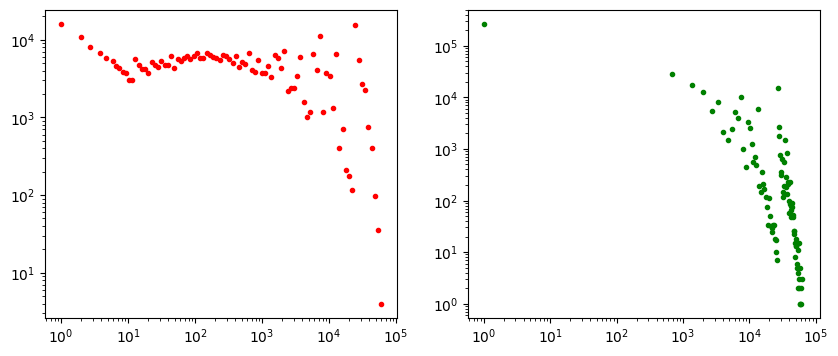

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].loglog(log_bins[:steps], v_log_hist, 'r.')
ax[1].loglog(bins[:steps], v_hist, 'g.')
plt.show()

In [ ]:
from scipy.stats import powerlaw
a = 0.559
values = (powerlaw.rvs(a, size=1000) + 1)*5000

v_min, v_max = min(values), max(values)
v_step = (v_max-v_min)/steps

bins = np.arange(v_min, v_max+v_step, (v_max-v_min)/steps)
log_bins = np.logspace(np.log10(v_min), np.log10(v_max), steps+1)

v_hist =        [ len([ x for x in values if (bins[i] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_hist_cum =    [ len([ x for x in values if (bins[0] <= x and x < bins[i+1]) ]) for i in range(steps) ]
v_log_hist =   [ len([ x for x in values if (log_bins[i] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]
v_hist_cum =   [ len([ x for x in values if (log_bins[0] <= x and x < log_bins[i+1]) ]) for i in range(steps) ]

""" fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].bar(bins[:steps], v_ist, width=v_step)
ax[1].bar(bins[:steps], v_ist_cum, width=v_step)
plt.show() """

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].loglog(log_bins[:steps], v_log_hist, 'r.')
ax[1].plot(np.log(log_bins[:steps]), np.log(v_log_hist), 'r.')
#ax[1].set_yscale('log')
#ax[1].loglog(bins[:steps], v_ist, 'g.')
plt.show()

In [ ]:
### HASHTAGS